# Lecture 16 Notes

## Power Law Distributions

A power-law distribution obeys the following PDF

$$f(x; \alpha, x_{\min}) = \frac{\alpha - 1}{x_{\min}} \left( \frac{x}{x_{\min}} \right)^{-\alpha}$$


## A power law distribution can exhibit infinite mean and undefined variance.

$$f(x; 2, 1) = \frac{2 - 1}{1} \left( \frac{x}{1} \right)^{-2} = x^{-2}$$

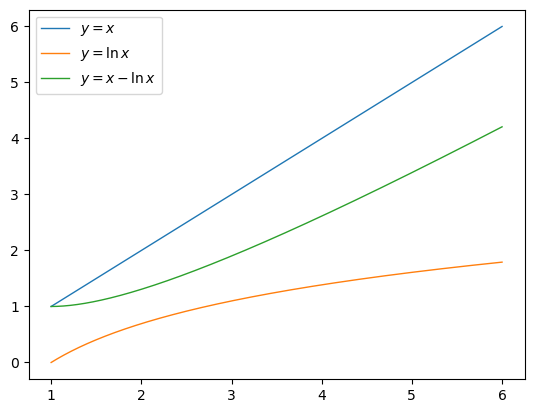

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 6, 1000)
y = x
#y_x2 = (x**2)/2
y_ln = np.log(x)

plt.plot(x, y, linewidth=1, label='$y = x$')
plt.plot(x, y_ln, linewidth=1, label='$y = \ln x$')
plt.plot(x, y-y_ln, linewidth=1, label='$y = x - \ln x$')
plt.legend()
plt.show()

This is a valid distribution meaning it is nonnegative for all \\(x\\) and it 
integrates to 1.

$$f(x; 2, 1) = \int_{x=1}^{\infty} \frac{1}{x^2} dx = -\frac{1}{x} \bigg|_1^{\infty} = 1-\frac{1}{\infty} =  1$$ 

The mean however is quite interesing

$$E[X] = \int_{x=1}^{\infty} x f(x; 2, 1)~dx = \int_{x=1}^{\infty} x \cdot \frac{1}{x^2}~dx = 
\int_{x=1}^{\infty} \frac{1}{x}~dx = \ln x \bigg|_{x=1}^{\infty}$$

$$\boxed{E[X] = \infty}$$

The mean diverges, so how is variance meaningful?

$$Var[X] = E[(x-\mu)^2] = E[x^2] - \mu^2 = \int_{x=1}^{\infty} x^2 f(x; 2, 1)~dx - \mu^2 = 
\int_{x=1}^{\infty} dx - \mu^2= x\bigg|_{x=1}^{\infty} - \infty = \infty - \infty$$

This does not produce a well-defined result.  Variance is considered to be
undefined for $\alpha=2$.


## What does infinite mean mean?

As the number of samples grows, the mean never converges.

/Users/dave/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


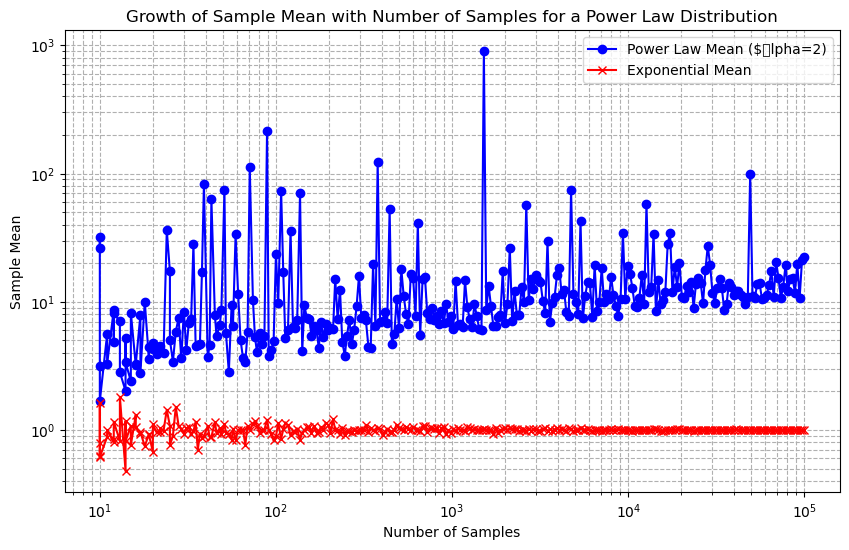

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the power law
alpha = 2
x_min = 1

# Function to generate power-law distributed samples
def generate_power_law_samples(n, alpha, x_min):
    r = np.random.uniform(0, 1, n)
    samples = x_min * (1 - r) ** (-1 / (alpha - 1))
    return samples

# Sample sizes to explore
sample_sizes = np.logspace(1, 5, 300).astype(int)  # from 10^1 to 10^5 samples, 20 points

# Store variances for each sample size
#variances = []
means = []

for size in sample_sizes:
    samples = generate_power_law_samples(size, alpha, x_min)
    #variances.append(np.var(samples, ddof=1))  # Sample variance
    means.append(np.mean(samples))

means_exponential = []

# Generating samples and calculating means
for size in sample_sizes:
    samples_exponential = np.random.exponential(scale=1, size=size)  # lambda = 1
    means_exponential.append(np.mean(samples_exponential))

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, means, marker='o', linestyle='-', color='blue',
           label=f"Power Law Mean ($\alpha={alpha})")
plt.loglog(sample_sizes, means_exponential, marker='x', linestyle='-',
           color='red', label='Exponential Mean')

plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.title('Growth of Sample Mean with Number of Samples for a Power Law Distribution')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Power law with infinite variance

The mean is not infinite for all power law distributions.

$$f(x; \alpha=3, x_{\min}=1) = \frac{\alpha - 1}{x_{\min}} \left( \frac{x}{x_{\min}} \right)^{-\alpha}
  = \frac{2}{1} \left( \frac{x}{1} \right)^{-3} = 2x^{-3}$$

Confirming that this is a valid distribution:

$$F(\infty) = \int_{x=1}^{\infty} \frac{2}{x^3}~dx = -\frac{1}{x^2}\bigg|_{x=1}^{\infty} = 0 -(-1) = 1 $$

Now let's find the expectation and variance.

$$E[X] = \int_{x=1}^{\infty} x f(x; \alpha=3, x_{min}=1)~dx = \int_{x=1}^{\infty} x \cdot \frac{2}{x^3} ~dx 
       = \int_{x=1}^{\infty} \frac{2}{x^2} ~dx
       = -\frac{2}{x} \bigg|_{x=1}^{\infty}$$
       
$$\boxed{E[x] = 2}$$

The variance is given by

$$Var[X] = E[(X-\mu)^2] = \int_{x=1}^{\infty} x^2 f(x)~dx - \mu^2 
       = \int_{x=1}^{\infty} x^2 \cdot \frac{2}{x^3} ~dx - \mu^2$$

$$Var[X] = \int_{x=1}^{\infty} \frac{2}{x} ~dx - \mu^2 
       = 2 \ln x \bigg|_{x=1}^{\infty} - 2^2 = 2 \ln \infty - 0 -4 $$
 
$$\boxed{Var[X] = \infty}$$

## What does infinite variance mean?

It means that as you gather samples, the sampel variacne never converges, it keeps 
growing the more samples you gather.

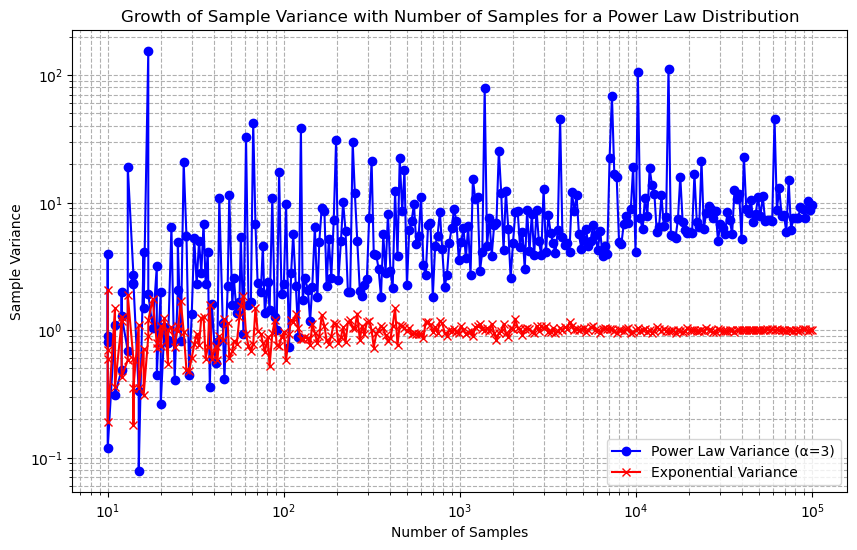

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the power law
alpha = 3
x_min = 1

# Function to generate power-law distributed samples
def generate_power_law_samples(n, alpha, x_min):
    r = np.random.uniform(0, 1, n)
    samples = x_min * (1 - r) ** (-1 / (alpha - 1))
    return samples

# Sample sizes to explore
sample_sizes = np.logspace(1, 5, 300).astype(int)  # from 10^1 to 10^5 samples, 20 points

# Store variances for each sample size
variances = []

for size in sample_sizes:
    samples = generate_power_law_samples(size, alpha, x_min)
    variances.append(np.var(samples, ddof=1))  # Sample variance

variances_exponential = []

# Generating samples and calculating means
for size in sample_sizes:
    samples_exponential = np.random.exponential(scale=1, size=size)  # lambda = 1
    variances_exponential.append(np.var(samples_exponential))
    
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, variances, marker='o', linestyle='-', color='blue',
          label="Power Law Variance (⍺=3)")
plt.loglog(sample_sizes, variances_exponential, marker='x', linestyle='-',
           color='red', label='Exponential Variance')

plt.xlabel('Number of Samples')
plt.ylabel('Sample Variance')
plt.title('Growth of Sample Variance with Number of Samples for a Power Law Distribution')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## Exponential

$$f(x;\lambda=1) = \lambda e^{-\lambda x} = e^{-1}$$

The following plots compare the exponential PDF with the two power law
distributions.  \\(1/x^2\\) and \\(1/x^3\\) have heavier tails than 
the exponential distribution.  The heavier tails result in the infinite
mean of \\(1/x^2\\) and infinite variance of \\(1/x^3\\) .

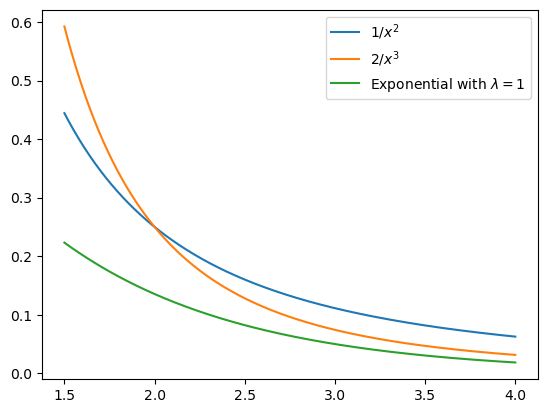

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

x = np.linspace(1.5, 4, 500)
f_over_x2 = x**(-2)

f_over_x3 = 2*(x**(-3))
f_over_x4 = 3*(x**(-4))

exp = expon(scale=1)

plt.plot(x, f_over_x2, label="$1/x^2$")
plt.plot(x, f_over_x3, label="$2/x^3$")
#plt.plot(x, f_over_x4, label="$3/x^4$")
#x = np.linspace(0, 3, 500)
plt.plot(x, exp.pdf(x), label="Exponential with $\lambda=1$")
plt.legend()
plt.show()

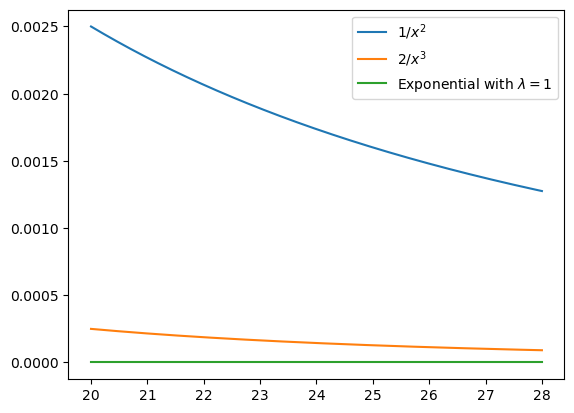

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

x = np.linspace(20, 28, 500)
f_over_x2 = x**(-2)

f_over_x3 = 2*(x**(-3))
f_over_x4 = 3*(x**(-4))

exp = expon(scale=1)

plt.plot(x, f_over_x2, label="$1/x^2$")
plt.plot(x, f_over_x3, label="$2/x^3$")
#plt.plot(x, f_over_x4, label="$3/x^4$")
#x = np.linspace(0, 3, 500)
plt.plot(x, exp.pdf(x), label="Exponential with $\lambda=1$")
plt.legend()
plt.show()